## 1. Case Description

A breast cancer dataset is a collection of data that is used to study the characteristics of breast cancer, including information on demographics, medical history, lifestyle factors, and the characteristics of the cancer itself. The dataset can include a wide range of information such as patient demographics, including age, gender, race, and family history, as well as information on the stage, grade, and size of the cancer, and the results of diagnostic tests such as mammography, ultrasound, and biopsy.


## 2. Objective

- Predict whether the patient has breast cancer or not

## 3. Machine learning process

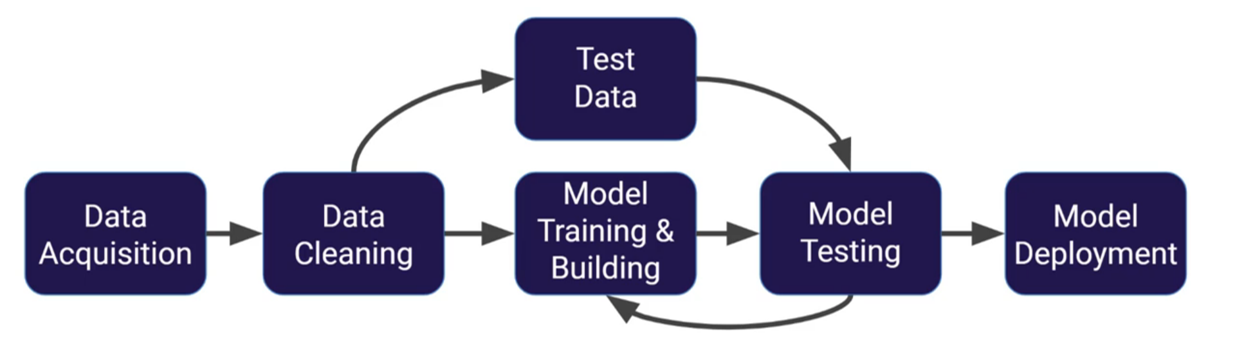

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dataset

In [3]:
df = pd.read_excel("(Train) framingham_heart_disease.xlsx")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
2,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
3,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0


In [4]:
df.shape

(4230, 16)

In [46]:
df['TenYearCHD'].value_counts()

0    3591
1     639
Name: TenYearCHD, dtype: int64

## Data preprocessing

In [50]:
for cols in df:
    df[cols] = df[cols].fillna(0)

In [51]:
# Check missing data
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [55]:
LE = LabelEncoder()
df['TenYearCHD']=LE.fit_transform(df['TenYearCHD'])

## Feature Selection

<AxesSubplot: >

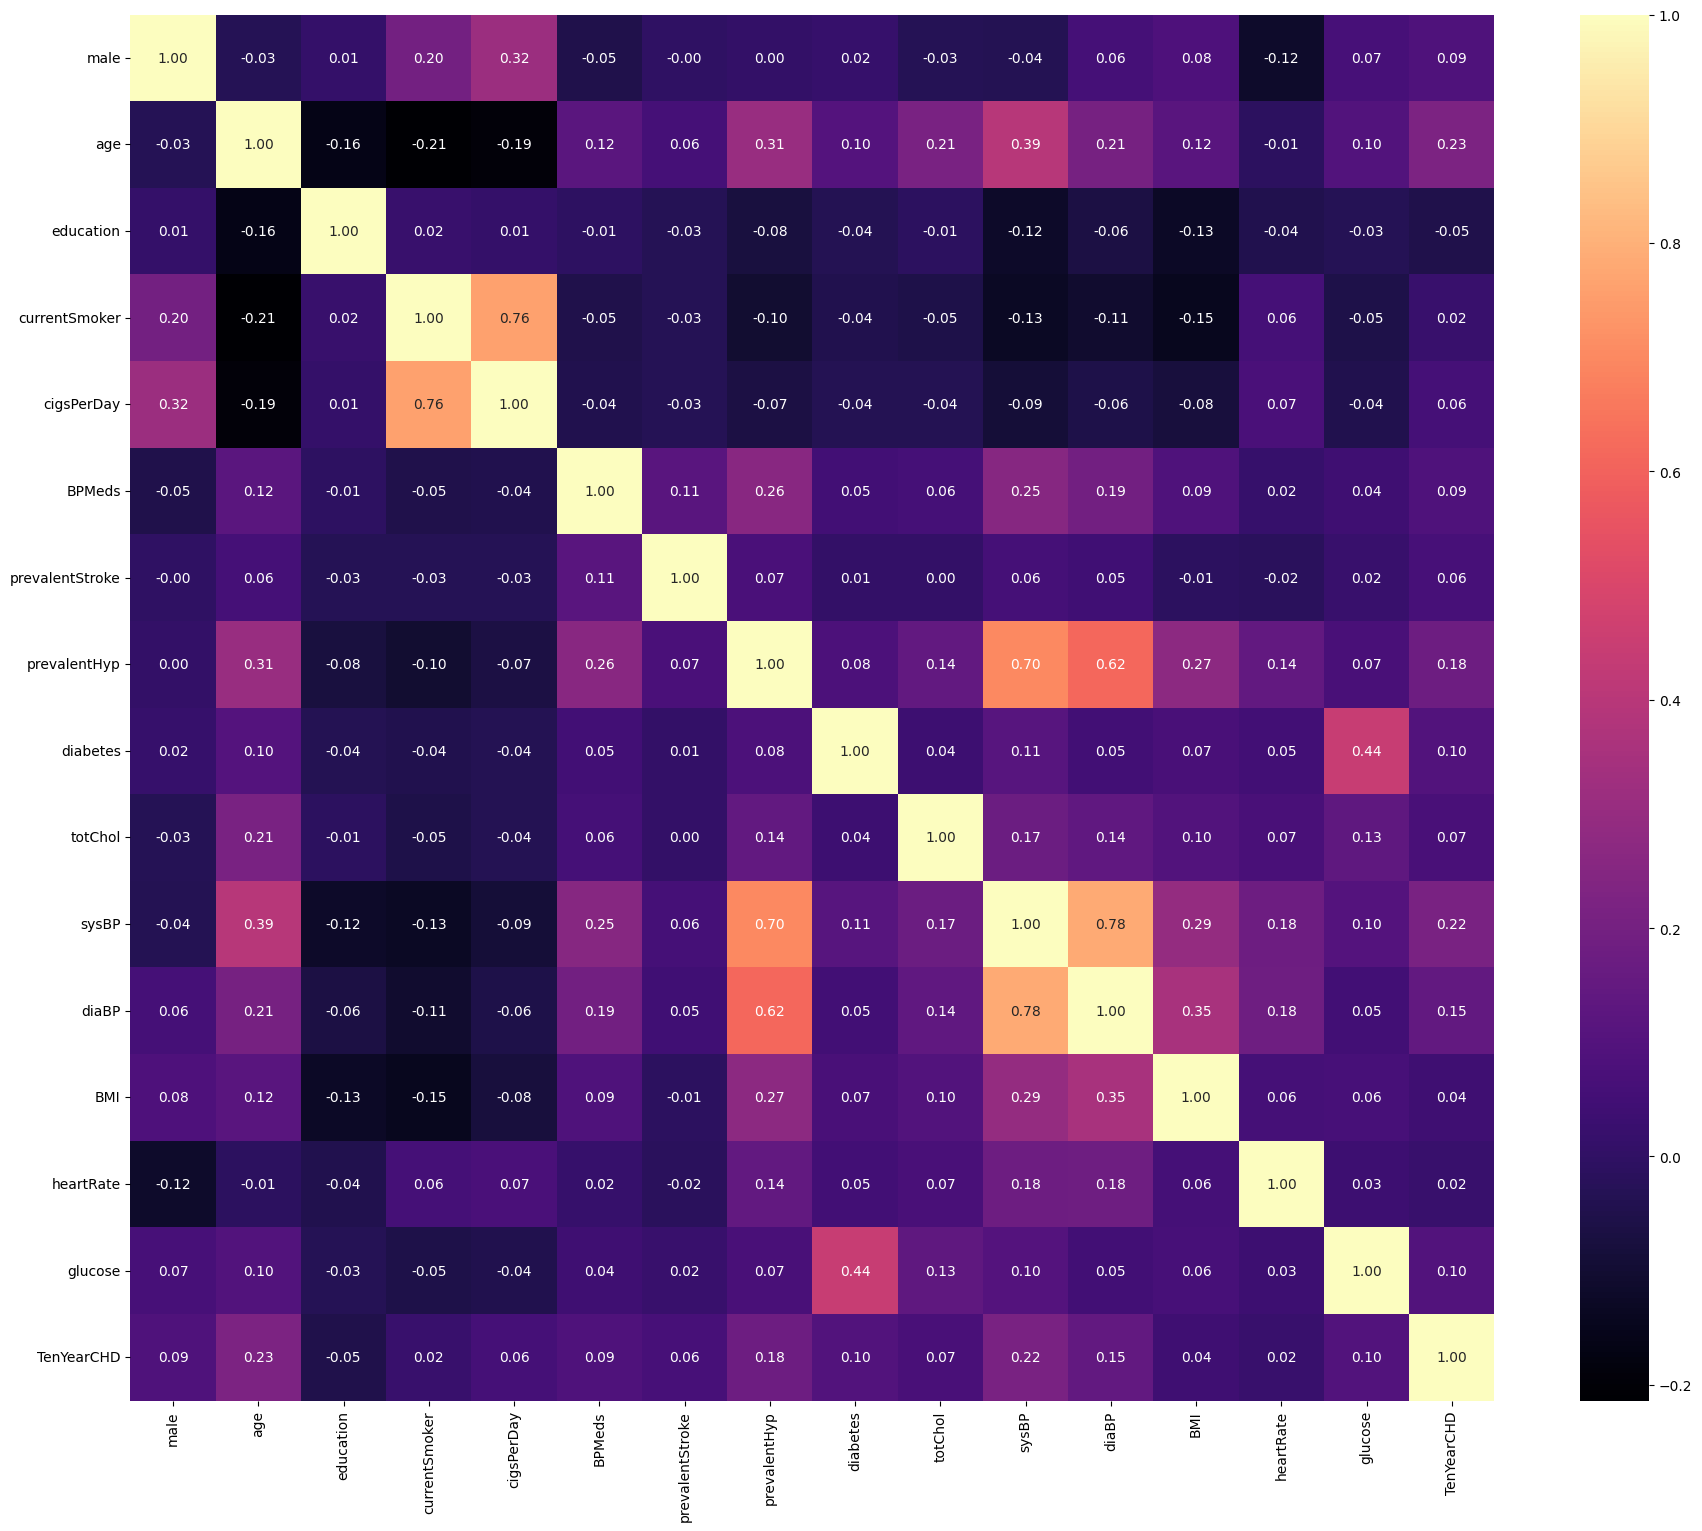

In [56]:
# Correlation heatmap
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [57]:
df1 = df[['currentSmoker', 'cigsPerDay', 'BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI', 'heartRate', 'glucose', 'TenYearCHD']]
df1

,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
2,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
3,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
4,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4226,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0,0
4227,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4228,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


## Model Training

In [58]:
X = df1.iloc[:, :7]
y = df1.iloc[:,-1]

Split the dataset into train and validation data

In [59]:
#Preparing the model
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 99)

Hyperparameter tuning

In [60]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()

param_dict = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], # Penalty, default = 'l2'
              'C' : np.logspace(-2, 2, 10), # regularization strength, default = 1.0
              'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'], #solver, default = 'lbfgs'
              'max_iter' : [100, 1000]} # default = '100'

grid = GridSearchCV(lc, param_grid=param_dict, cv=cv)
grid.fit(X_train, y_train)

grid.best_params_

c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Model evaluation

In [61]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100, max_iter = 100, penalty = 'l1', solver = 'liblinear')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8534278959810875

In [62]:
y_train_pred = model.predict(X_test)

In [1]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

cm = confusion_matrix(y_test, y_train_pred)

sns.heatmap(cm, annot = True)

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\chiss\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\__init__.py)

## New case

In [31]:
DT = pd.read_excel("New_case_framingham_heart_disease.xlsx")
DT

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
1,857010,M,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,...,22.820,21.32,150.60,1567.0,0.16790,0.50900,0.73450,0.23780,0.3799,0.09185
2,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
3,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.01103,0.014070,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.04043,0.05159,0.2841,0.08175
4,8911163,M,17.930,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.047440,...,20.920,34.69,135.10,1320.0,0.13150,0.18060,0.20800,0.11360,0.2504,0.07948
5,903554,B,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.033260,...,13.560,25.80,88.33,559.5,0.14320,0.17730,0.16030,0.06266,0.3049,0.07081
6,9110732,M,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.082930,...,21.530,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
7,9110944,B,14.800,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.022600,...,16.430,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285
8,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905
9,925622,M,15.220,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090


In [32]:
DT['diagnosis']=LE.fit_transform(DT['diagnosis'])

In [33]:
DT1 = DT[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'diagnosis']]

X_new = DT1.iloc[:, :15]
y_new = DT1.iloc[:,:-1]

In [34]:
DT1

,radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,diagnosis
0,19.690,130.00,1203.0,0.15990,0.19740,0.127900,0.7456,4.585,94.030,23.570,152.50,1709.0,0.42450,0.45040,0.24300,1
1,18.650,123.70,1076.0,0.16860,0.19740,0.100900,0.6289,4.293,71.560,22.820,150.60,1567.0,0.50900,0.73450,0.23780,1
2,8.196,51.71,201.9,0.05943,0.01588,0.005917,0.1563,1.094,8.205,8.964,57.26,242.2,0.13570,0.06880,0.02564,0
3,9.742,61.50,289.9,0.04689,0.01103,0.014070,0.2684,1.750,16.390,10.750,68.09,355.2,0.09370,0.04043,0.05159,0
4,17.930,115.20,998.9,0.07027,0.05699,0.047440,0.4212,2.765,45.810,20.920,135.10,1320.0,0.18060,0.20800,0.11360,1
5,12.100,78.07,446.2,0.09758,0.04783,0.033260,0.2841,1.869,22.220,13.560,88.33,559.5,0.17730,0.16030,0.06266,0
6,17.750,117.30,981.6,0.13140,0.16980,0.082930,0.3897,2.873,43.950,21.530,145.40,1437.0,0.37620,0.63990,0.19700,1
7,14.800,95.88,674.8,0.08890,0.04069,0.022600,0.2204,1.482,19.750,16.430,105.90,829.5,0.18810,0.20600,0.08308,0
8,11.200,70.67,386.0,0.03558,0.00000,0.000000,0.3141,2.041,22.810,11.920,75.19,439.6,0.05494,0.00000,0.00000,0
9,15.220,103.40,716.9,0.20870,0.25500,0.094290,0.2602,2.362,22.650,17.520,128.70,915.0,0.79170,1.17000,0.23560,1


In [35]:
y_pred = model.predict(X_new)

In [36]:
diag = []
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    diag.append('M')
  else:
    diag.append('B')

diag = pd.DataFrame(diag, columns = ['diagnosis_pred'])
diag

,diagnosis_pred
0,M
1,M
2,B
3,B
4,M
5,B
6,M
7,B
8,B
9,M
